In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) # to display all columns
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Key Takeaways:
###### SeniorCitizens column is marked as an integer. one of the only binary classification rows to be marked as such.
###### TotalCharges is marked as a 'non-null object' and should be a float64

In [6]:
# having an understanding for how datatypes are printed
print(df['PaymentMethod'].dtype)
print(df['MonthlyCharges'].dtype)
print(df['SeniorCitizen'].dtype)

object
float64
int64


In [7]:
def preliminary_research(df):
    for col in df.columns:
        unique_vals = df[col].unique()
        if len(unique_vals) < 10:
            print("Unique values for column {}: {}".format(col, unique_vals))
        else:
            if df[col].dtype == 'object':
                print("column {} has values string type".format(col))
            elif df[col].dtype == 'int64':
                print("column {} is numerical".format(col))
            elif df[col].dtype == 'float64':
                print("column {} is numerical".format(col))
    return

preliminary_research(df)

column customerID has values string type
Unique values for column gender: ['Female' 'Male']
Unique values for column SeniorCitizen: [0 1]
Unique values for column Partner: ['Yes' 'No']
Unique values for column Dependents: ['No' 'Yes']
column tenure is numerical
Unique values for column PhoneService: ['No' 'Yes']
Unique values for column MultipleLines: ['No phone service' 'No' 'Yes']
Unique values for column InternetService: ['DSL' 'Fiber optic' 'No']
Unique values for column OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values for column OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values for column DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values for column TechSupport: ['No' 'Yes' 'No internet service']
Unique values for column StreamingTV: ['No' 'Yes' 'No internet service']
Unique values for column StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values for column Contract: ['Month-to-month' 'One year' 'Two year']
Unique values for 

In [8]:
# Looking into TotalCharges, which has a value string type for some strange reason
df['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

## A Breakdown of the Columns

##### 'CustomerID'
* ID numbers which have no impact on churn

##### 'Gender' is binary
* Male
* Female

##### 'SeniorCitizen' is binary
* 0 - no
* 1 - yes

##### 'Partner' is binary
* Yes - customer has a partner
* No - customer do not have a partner

##### 'Dependents' is binary
* Yes - customer has dependent(s)
* No - customer does not have dependents

##### 'Tenure' is numerical
* Represents how long the customer has been using the service

##### 'PhoneService' is binary
* Yes - customer has phone service with company
* no - customer do not have phone service with company

##### 'MultipleLines' is categorical
* Yes - customer has multiple line subscriptions
* No - customer has only 1 line subscription
* No phone service - customer do not have phone service with company

##### 'InternetService' is categorical
* DSL
* Fiber optic
* No - customer do not have internet service with company

##### 'OnlineSecurity' is categorical
* Yes - customer has online security with company
* No - customer do not have online security with company
* No internet service - customer do not have internet service with company

##### 'OnlineBackup' is categorical
* Yes - customer has online backup with company
* No - customer do not have online backup with company
* No internet service - customer do not have internet service with company

##### 'DeviceProtection' is categorical
* Yes - customer has device protection with company
* No - customer do not have device protection with company
* No internet service - customer do not have internet service with company

##### 'TechSupport' is categorical
* Yes - customer has technical support with company
* No - customer do not have technical support with company
* No internet service - customer do not have internet service with company

##### 'StreamingTV' is categorical
* Yes - customer has streaming TV service with company
* No - customer do not have streaming TV service with company
* No internet service - customer do not have internet service with company

##### 'StreamingMovies' is categorical
* Yes - customer has streaming movies service with company
* No - customer do not have streaming movies with company
* No internet service - customer do not have internet service with company

##### 'Contract' is categorical
* Month-to-month - customer is on a no-commitment plan
* One year - customer is on a 1-year contract commitment
* Two year - customer is on a 2-year contract commitment

##### 'PaperlessBilling' is binary
* Yes - only receives bills via email
* No - receives letters in mail with bill

##### 'PaymentMethod' is categorical 
* Electronic check
* Mailed check 
* Bank transfer (automatic)
* Credit card (automatic)

##### 'MonthlyCharges' is numerical
* count    7043.000000
* mean       64.761692
* std        30.090047
* min        18.250000
* 25%        35.500000
* 50%        70.350000
* 75%        89.850000
* max       118.750000

##### 'TotalCharges' -- NEEDS ATTENTION
* Says that dtype is a string. However, this should be numerical...

##### 'Churn' is binary
* No - customer is still an active customer
* Yes - customer has left service

## Work that is cut out for me in the cleaning process:
1. change column names to all lowercase and no spaces
2. convert all "yes / no" binary options to numerical 0s and 1s
3. convert df['totalcharges'] values from objects to a floats
4. drop the 'customerid' column
5. dummify the categorical variables

In [9]:
# change column names to all lowercase
df.columns = map(str.lower, df.columns)

In [10]:
# convert "No / Yes" binary options to numerical 0s and 1s
df.gender = df.gender.map({'Male':0 ,'Female':1})
df.partner = df.partner.map({'No':0 ,'Yes':1})
df.dependents = df.dependents.map({'No':0 ,'Yes':1})
df.phoneservice = df.phoneservice.map({'No':0 ,'Yes':1})
df.paperlessbilling = df.paperlessbilling.map({'No':0 ,'Yes':1})
df.churn = df.churn.map({'No':0, 'Yes':1})

# convert the categorical variables that have numeric significance into numerical
df.multiplelines = df.multiplelines.map({'No phone service':0, 'No':1, 'Yes':2})
df.contract = df.contract.map({'Month-to-month':0, 'One year':1, 'Two year':2})

In [11]:
df['totalcharges'] = df['totalcharges'].replace(' ', np.nan, regex=True) # replaces blank to NaN
df['totalcharges'] = df.totalcharges.astype(float) # converts to float

In [12]:
df = df.dropna()

In [13]:
# drop 'customerid' column.
df = df.drop(columns = 'customerid')

In [14]:
# create dummy variables
df_dummified = pd.get_dummies(df, drop_first=True, dtype=int)

# Visualizing Relationships

### Target Feature

0    5163
1    1869
Name: churn, dtype: int64

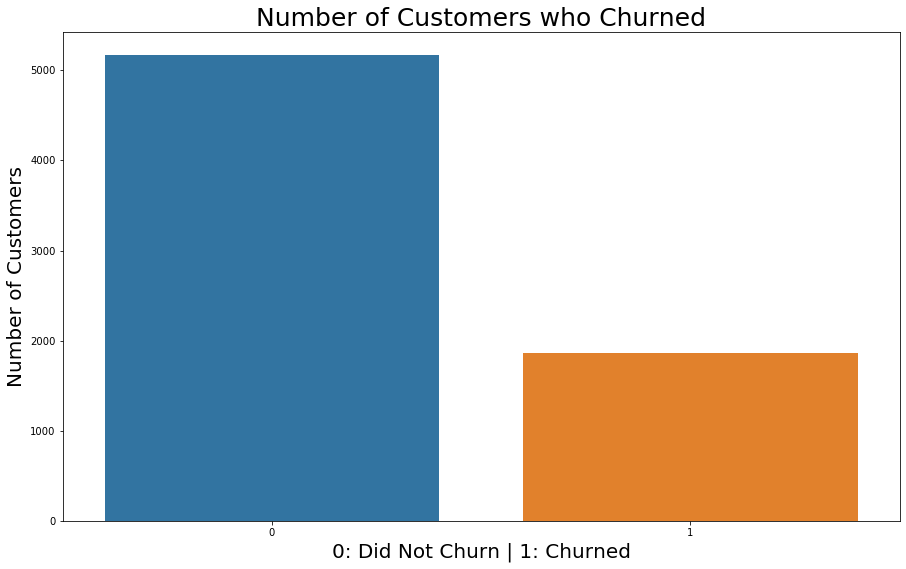

In [15]:
# Class frequency of target variable 
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='churn', data=df)
ax.set_xlabel('0: Did Not Churn | 1: Churned', fontsize=20)
ax.set_ylabel('Number of Customers', fontsize=20)
ax.set_title('Number of Customers who Churned', fontsize=25);
df['churn'].value_counts()

In [16]:
percent_that_churned = ((1869/5163)*100)
print('The total percentage of customers that churned:', round(percent_that_churned,1))

The total percentage of customers that churned: 36.2


> Notes: Class imbalance - Most customers in this dataset have not churned.

### Exploring Numerical Variables

totalcharges                                                     \
             count         mean          std    min      25%      50%   
churn                                                                   
0           5163.0  2555.344141  2329.456984  18.80  577.825  1683.60   
1           1869.0  1531.796094  1890.822994  18.85  134.500   703.55   

                          
            75%      max  
churn                     
0      4264.125  8672.45  
1      2331.300  8684.80

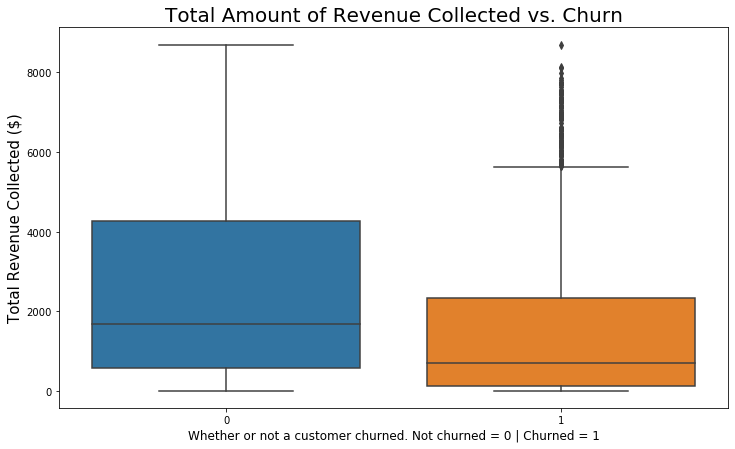

In [17]:
# Looking at the relationship between the total amount of revenue earned and whether or not they churned
plot1 = pd.concat([df['totalcharges'], df['churn']], axis=1)
f, ax = plt.subplots(figsize=(12, 7))
fig = sns.boxplot(x='churn', y='totalcharges', data=plot1)
plt.title("Total Amount of Revenue Collected vs. Churn", fontsize=20)
ax.set_ylabel('Total Revenue Collected ($)', fontsize=15)
ax.set_xlabel('Whether or not a customer churned. Not churned = 0 | Churned = 1', fontsize=12);
df.groupby('churn')[['totalcharges']].describe()

> Notes: Customers who do not churn generate a larger revenue than customers who churn. Specifically, customers who do not churn generate on average $1023.54 more revenue than customers who churn.

In [18]:
# Projecting how much revenue could have been generated by customers who churned
projection = 1869*2555.34 - 1869*1531.80
projection_in_millions = projection/1000000
print("Revenue that would have been generated if customers who had churned",
       "spent the average lifetime revenue from customers who did not churn:",
       round(projection_in_millions, 3), "million USD.")

Revenue that would have been generated if customers who had churned spent the average lifetime revenue from customers who did not churn: 1.913 million USD.


   churn  totalcharges  revenueinmillions
0      0    13193241.8          13.193242
1      1     2862926.9           2.862927


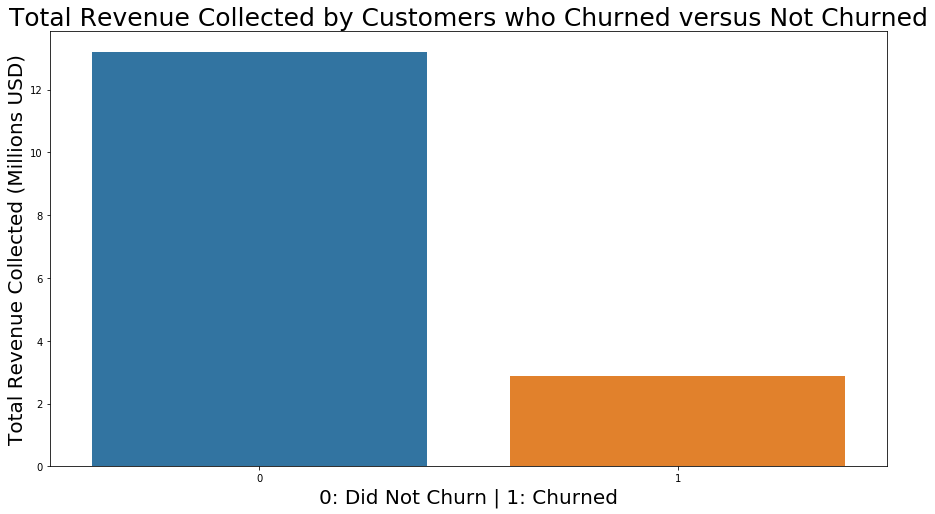

In [19]:
# calculating the total amount of revenue collected
# by customers who churned versus not churned
df_total_revenues = df.groupby(["churn"]).totalcharges.sum().reset_index()
df_total_revenues['revenueinmillions'] = df_total_revenues['totalcharges']/1000000
print(df_total_revenues)
# Class frequency of target variable 
plt.figure(figsize=(15,8))
ax = sns.barplot(x='churn', y='revenueinmillions', data=df_total_revenues)
ax.set_xlabel('0: Did Not Churn | 1: Churned', fontsize=20)
ax.set_ylabel('Total Revenue Collected (Millions USD)', fontsize=20)
ax.set_title('Total Revenue Collected by Customers who Churned versus Not Churned', fontsize=25);

The amount of money spent by customers per month who are on the threshold of likely to churn: 59.65 USD


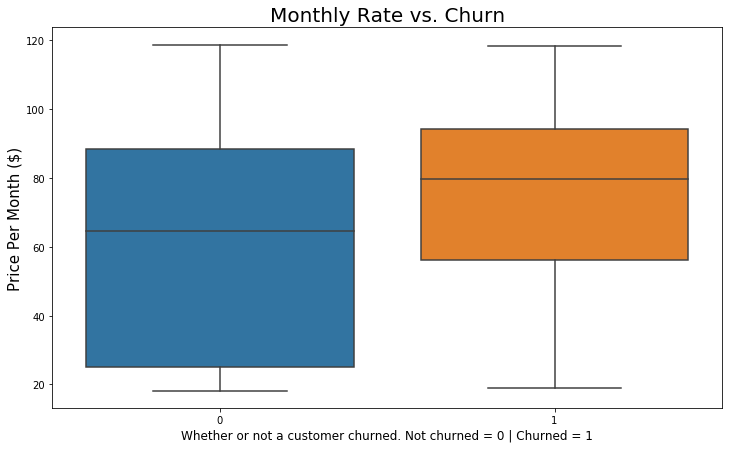

In [20]:
# Looking at the relationship between the monthly bill and whether or not they churned
plot1 = pd.concat([df['monthlycharges'], df['churn']], axis=1)
f, ax = plt.subplots(figsize=(12, 7))
fig = sns.boxplot(x='churn', y='monthlycharges', data=plot1)
plt.title("Monthly Rate vs. Churn", fontsize=20)
ax.set_ylabel('Price Per Month ($)', fontsize=15)
ax.set_xlabel('Whether or not a customer churned. Not churned = 0 | Churned = 1', fontsize=12);
print("The amount of money spent by customers per month who are on the threshold of likely to churn:",
       df.monthlycharges.quantile(0.407), "USD")

> Notes: Customers who do not churn spend less per month.

In [21]:
churn = df['churn'] == 1
did_not_churn = df['churn'] == 0

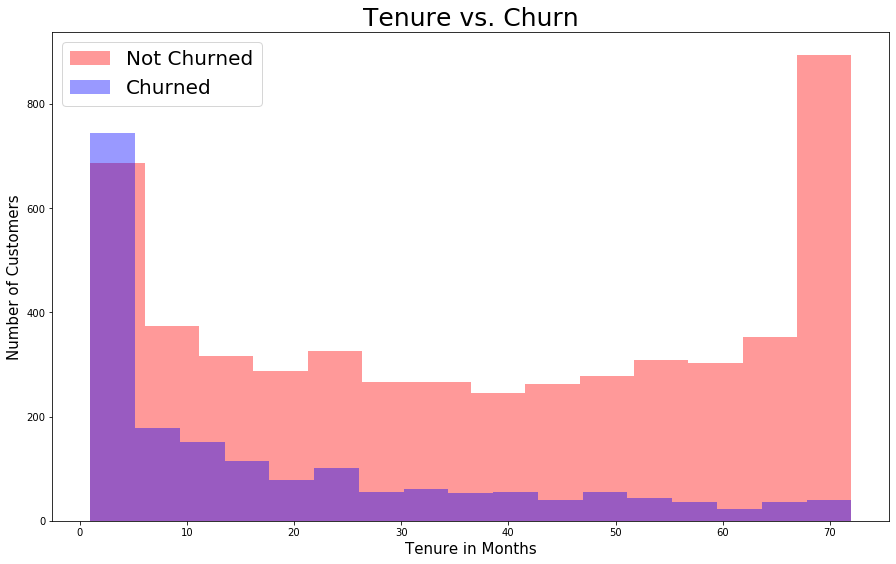

In [22]:
# Histogram looking at customer tenure
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.distplot(df[~churn]['tenure'], label='Not Churned',
                  kde=False, color='red')
sns.distplot(df[churn]['tenure'], label='Churned', kde=False, color='blue')
ax.set_xlabel('Tenure in Months', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Tenure vs. Churn', fontsize=25)
ax.legend(fontsize=20);

> Notes: The highest frequency of customers who churned did not stay with the service for more than one month. The highest frequency of customers who did not churn stayed with the service for seventy months. As tenure increased, the frequency of customers who churned decreased.

## Exploring Categorical Variables

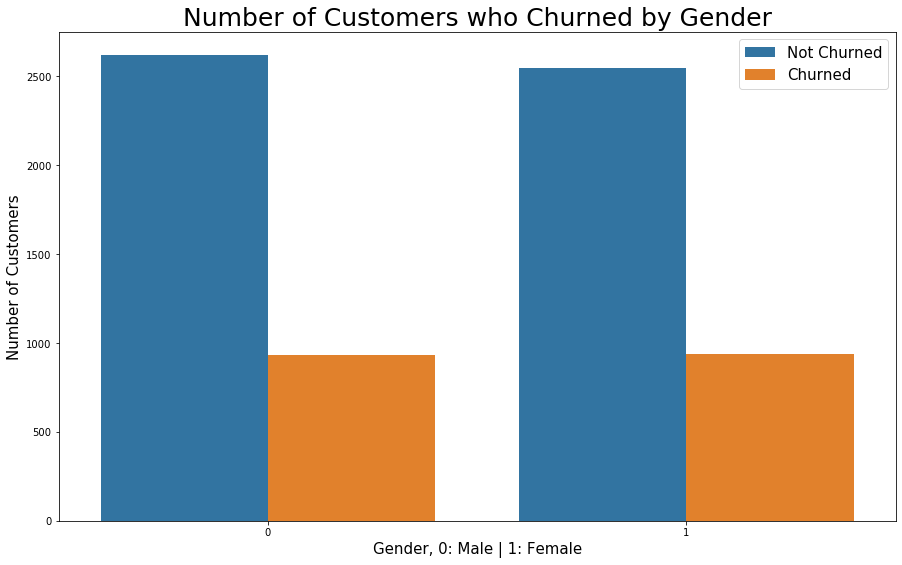

In [23]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='gender', hue='churn', data=df)
ax.set_xlabel('Gender, 0: Male | 1: Female', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Customers who Churned by Gender', fontsize=25)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: Appears negligible based upon gender. Maybe slightly more male customers who did not churn versus female customers who did not churn.

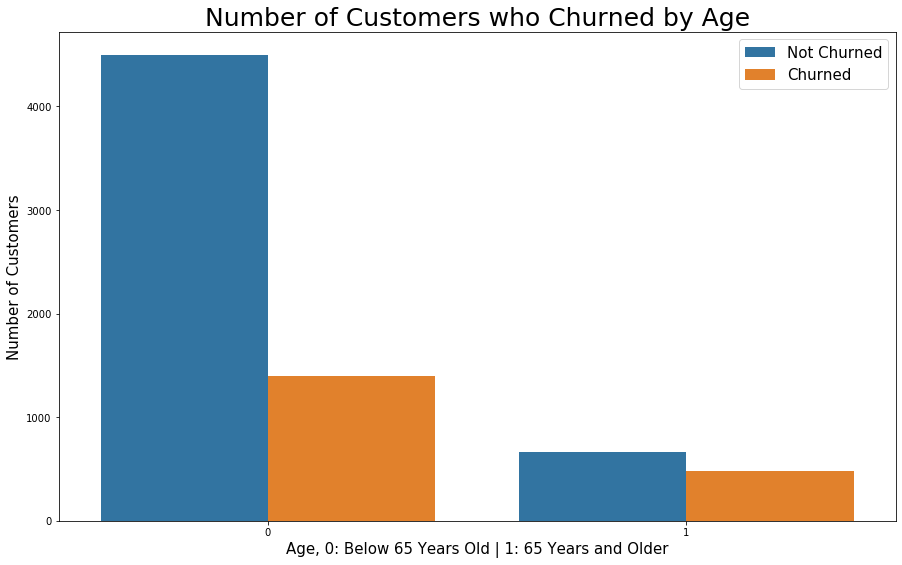

In [24]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='seniorcitizen', hue='churn', data=df)
ax.set_xlabel('Age, 0: Below 65 Years Old | 1: 65 Years and Older', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Customers who Churned by Age', fontsize=25)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: There is a substantially large group of non-seniors who did not churn. They represent the majority of the data. There is also a large class imbalance between the number of non-seniors and seniors.

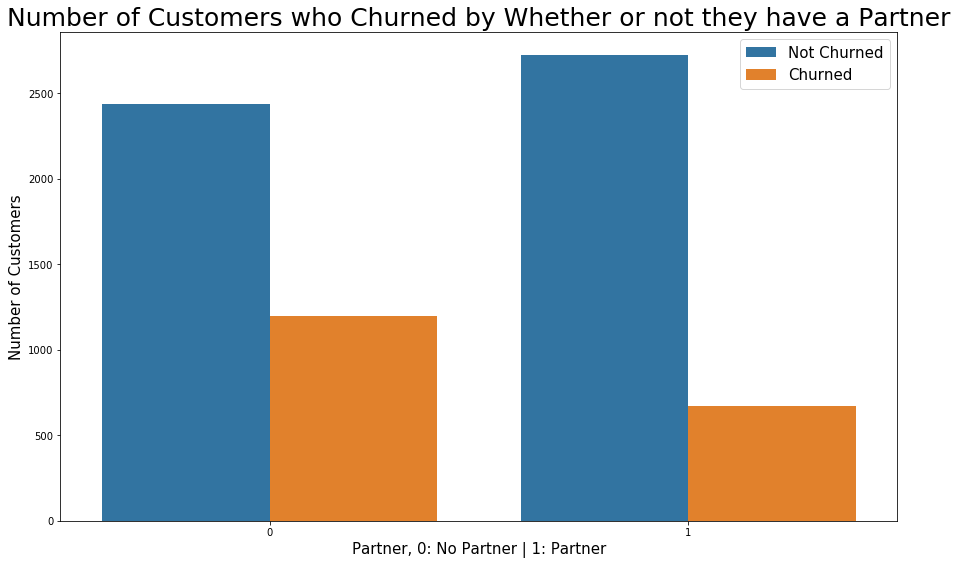

In [25]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='partner', hue='churn', data=df)
ax.set_xlabel('Partner, 0: No Partner | 1: Partner', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Customers who Churned by Whether or not they have a Partner', fontsize=25)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: Customers who have a partner have a higher count of non-churners and a lower count of churners. It appears that having a partner has a negative effect on churn. If you have a partner, you are less likely to churn.

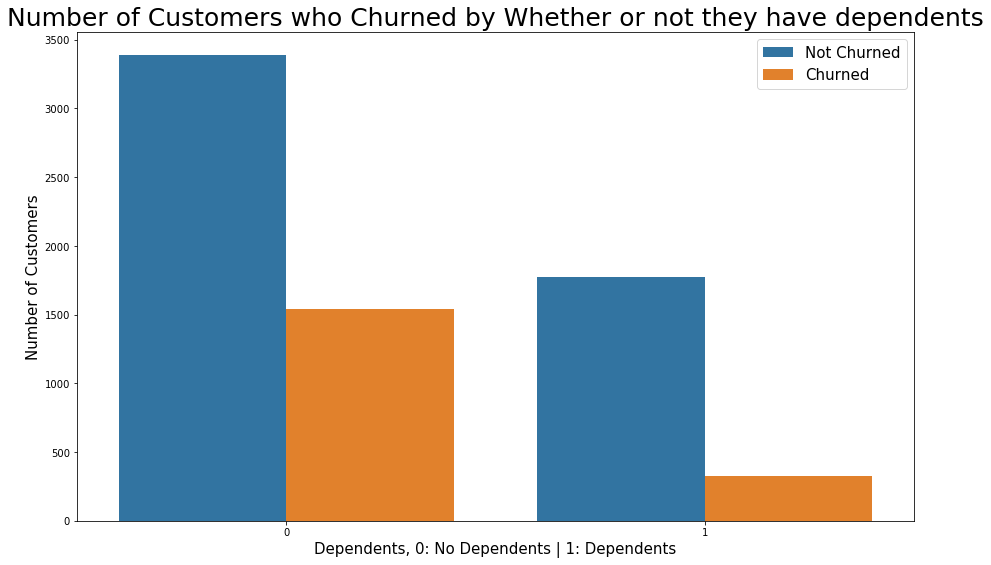

In [26]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='dependents', hue='churn', data=df)
ax.set_xlabel('Dependents, 0: No Dependents | 1: Dependents', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Customers who Churned by Whether or not they have dependents', fontsize=25)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: Class imbalance - there is a much larger group of customers without dependents. The ratio of non-churners to churners increases with dependents.

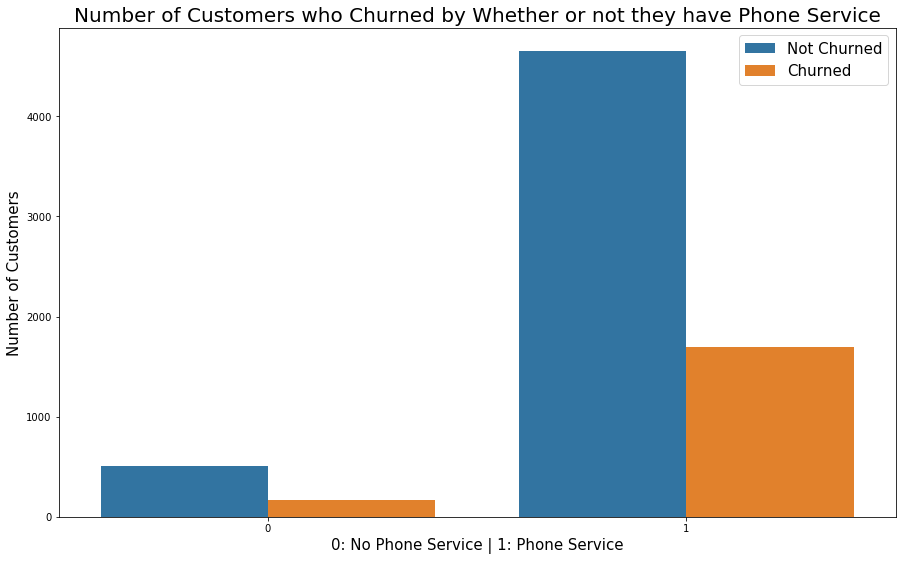

In [27]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='phoneservice', hue='churn', data=df)
ax.set_xlabel('0: No Phone Service | 1: Phone Service', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Customers who Churned by Whether or not they have Phone Service', fontsize=20)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: Class Imbalance - there is a much larger group of customers who have phone service. Both categories reflect a similar trend - about half as many customers churned as opposed to not churn.

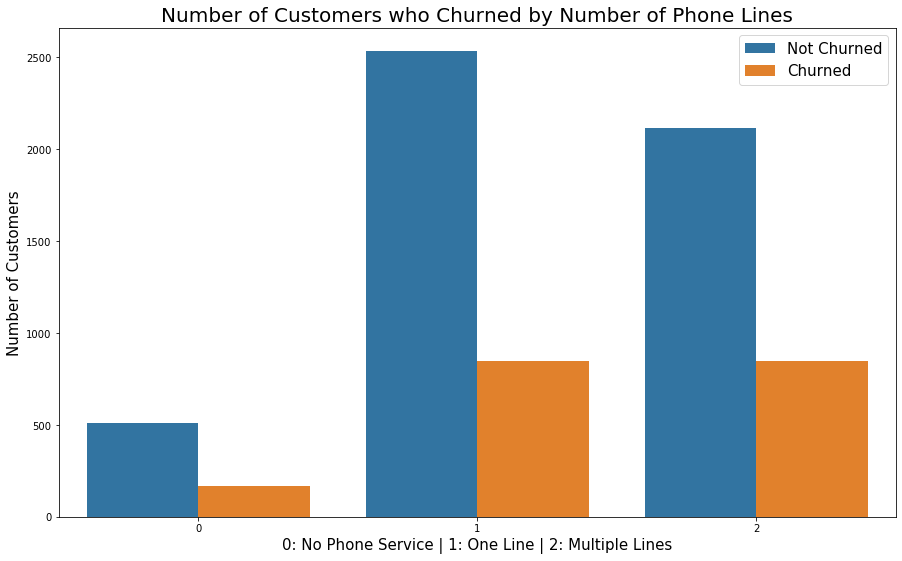

In [28]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='multiplelines', hue='churn', data=df)
ax.set_xlabel('0: No Phone Service | 1: One Line | 2: Multiple Lines', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Customers who Churned by Number of Phone Lines', fontsize=20)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: Class imbalance. There are a substantially greater amount of customers with atleast one phone line than without phone service. There are more customers with one phone line that have not churned than with two or more phone lines that have not churned. It appears that the ratio of non-churners to churners increases with the addition of atleast one phone line.

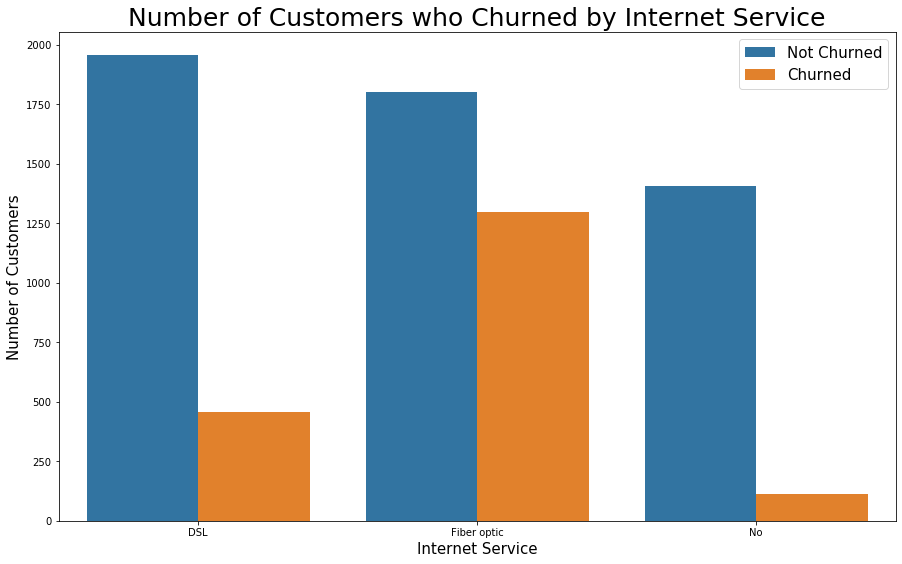

In [29]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='internetservice', hue='churn', data=df)
ax.set_xlabel('Internet Service', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Customers who Churned by Internet Service', fontsize=25)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: The category with the highest count of churners is those with fiber optic internet service. Customers without internet service or DSL service have high ratios of non-churners to churners.

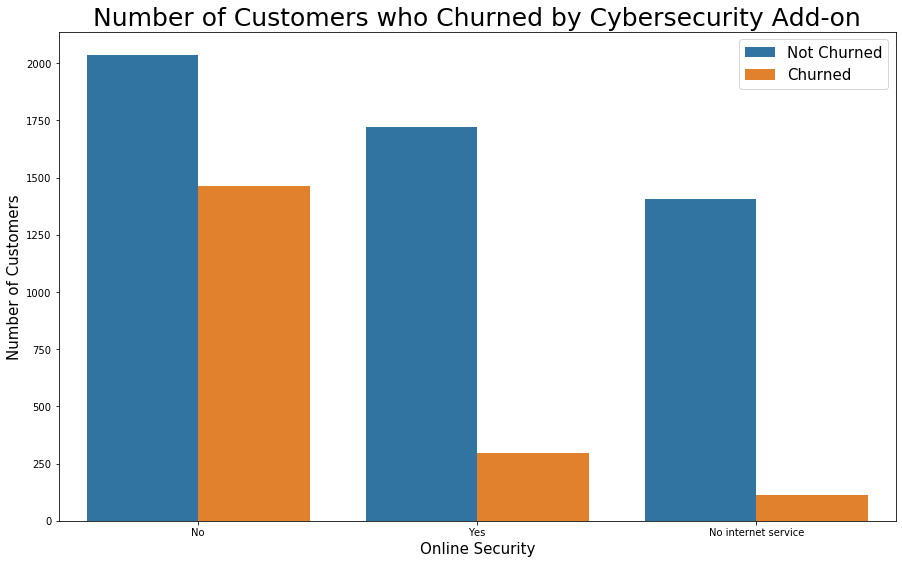

In [30]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='onlinesecurity', hue='churn', data=df)
ax.set_xlabel('Online Security', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Customers who Churned by Cybersecurity Add-on', fontsize=25)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: Customers who do not have internet--but no online security--have a high frequency of churning.

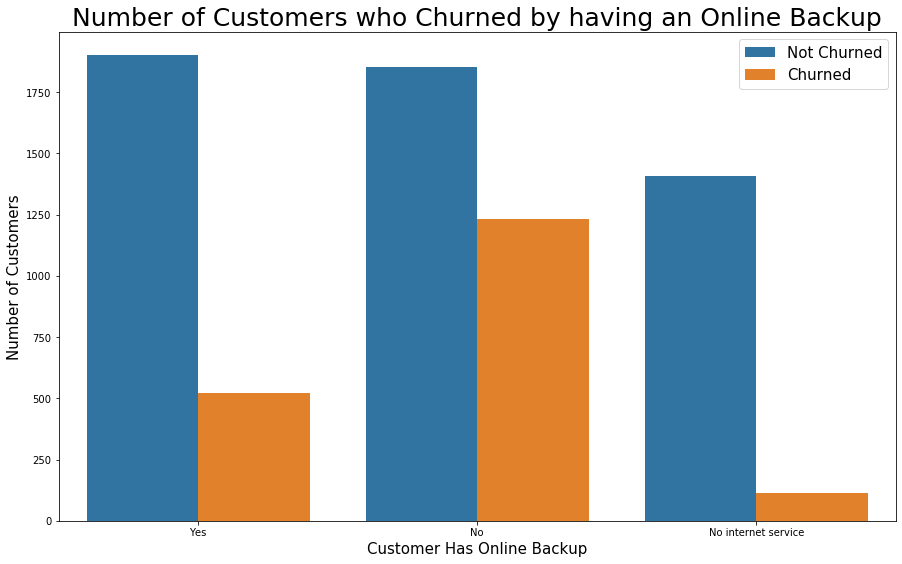

In [31]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='onlinebackup', hue='churn', data=df)
ax.set_xlabel('Customer Has Online Backup', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Customers who Churned by having an Online Backup', fontsize=25)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: Customers who have an online backup are less likely to churn than customers without an online backup.

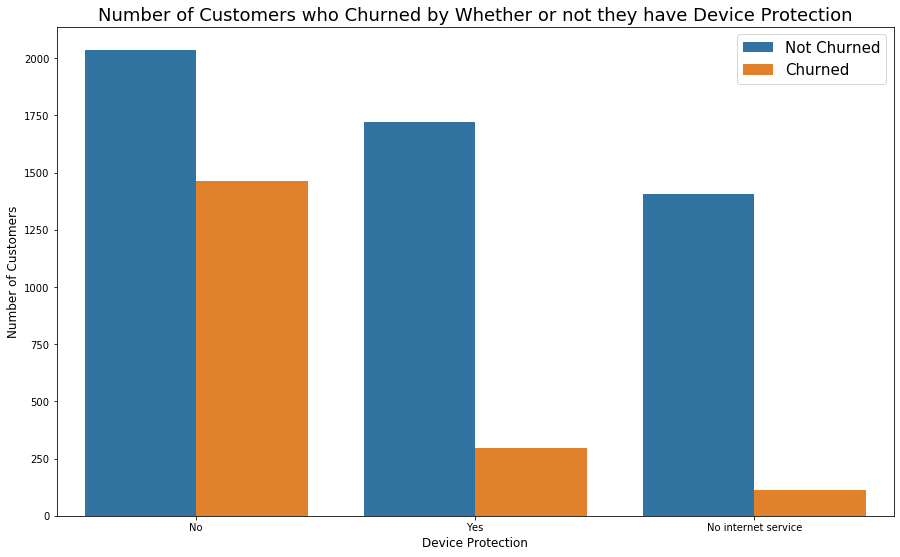

In [32]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='onlinesecurity', hue='churn', data=df)
ax.set_xlabel('Device Protection', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_title('Number of Customers who Churned by Whether or not they have Device Protection', fontsize=18)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: Customers who do not have device protection have a higher count of churn than customers with device protection.

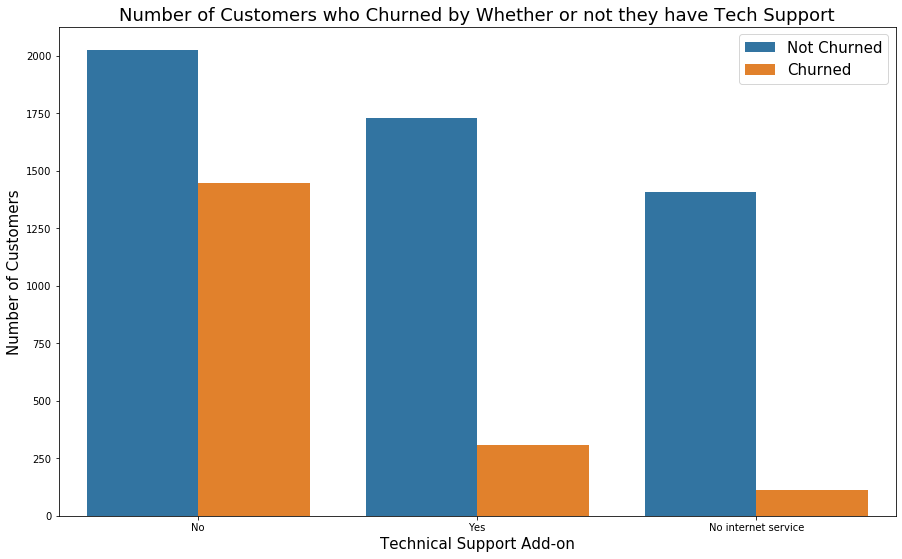

In [33]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='techsupport', hue='churn', data=df)
ax.set_xlabel('Technical Support Add-on', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Customers who Churned by Whether or not they have Tech Support', fontsize=18)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: Customers without the tech support add-on have a much higher count of churn than customers who have technical support.

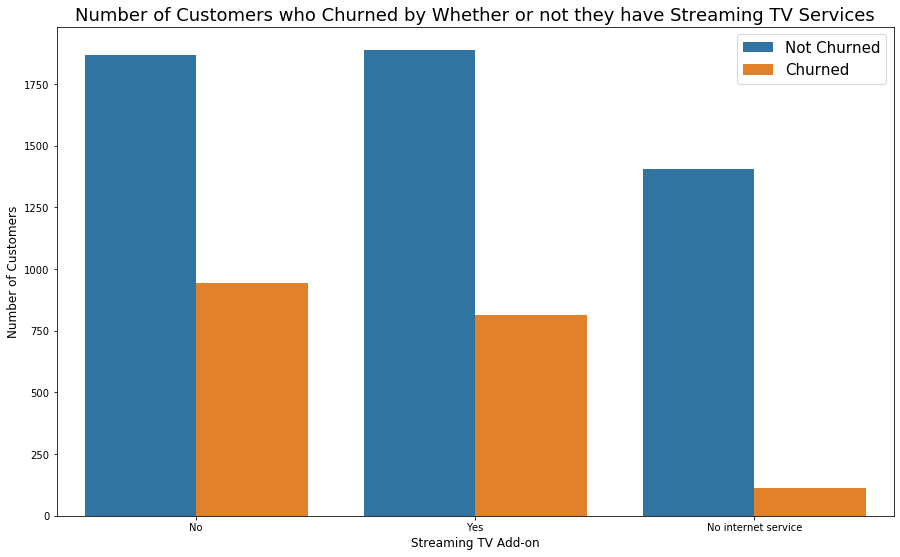

In [34]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='streamingtv', hue='churn', data=df)
ax.set_xlabel('Streaming TV Add-on', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_title('Number of Customers who Churned by Whether or not they have Streaming TV Services', fontsize=18)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: Customers who do not have the Streaming TV Add-on have a higher count of customers that churn than those who do have the Streaming TV Add-on.

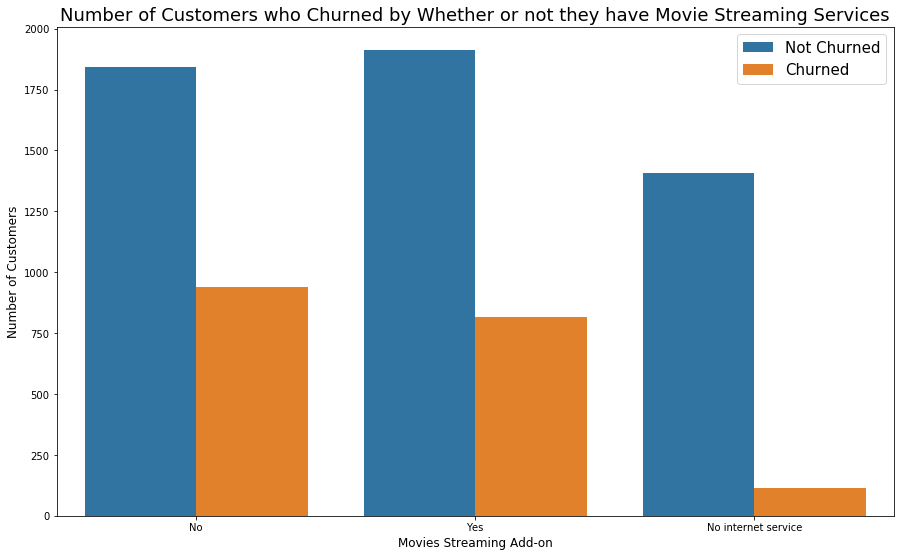

In [35]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='streamingmovies', hue='churn', data=df)
ax.set_xlabel('Movies Streaming Add-on', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_title('Number of Customers who Churned by Whether or not they have Movie Streaming Services', fontsize=18)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: This represents a very similar model to what is displayed in the TV Streaming add-on.

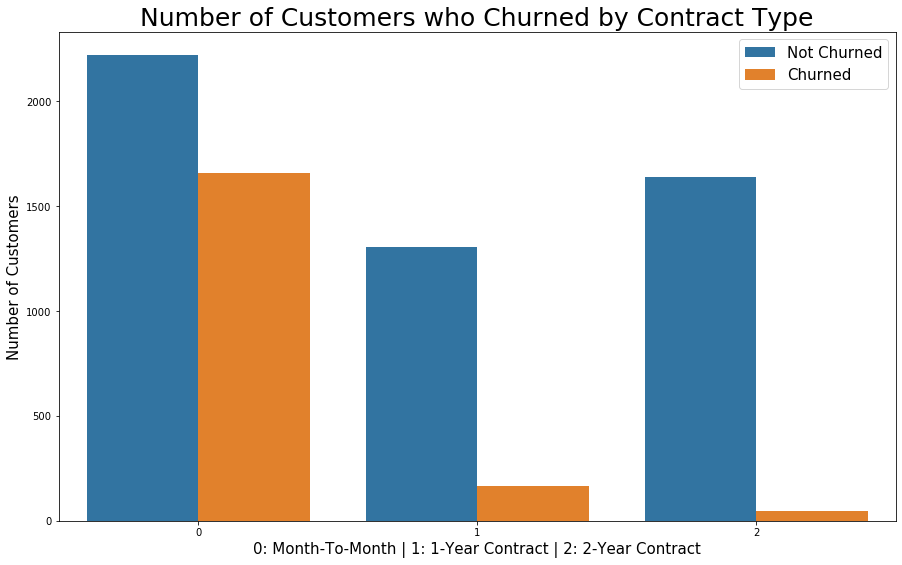

In [36]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='contract', hue='churn', data=df)
ax.set_xlabel('0: Month-To-Month | 1: 1-Year Contract | 2: 2-Year Contract', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Customers who Churned by Contract Type', fontsize=25)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: Customers who do not have a contract and are on a month-to-month service have a much higher count of churning than customers who have a 1-year contract, and especially those who have a 2-year contract.

In [37]:
df_total_contracts = df.groupby(["churn"]).contract.sum().reset_index()
df_total_contracts

,churn,contract
0,0,4580
1,1,262


In [38]:
print(df.groupby('contract')[['churn']].describe())
num_of_folks_not_on_contract = 3875
percent_not_on_contract = (num_of_folks_not_on_contract/7032)*100
print("Percentage of customers that are not on a longterm contract:",round(percent_not_on_contract,2))

           churn                                             
           count      mean       std  min  25%  50%  75%  max
contract                                                     
0         3875.0  0.427097  0.494720  0.0  0.0  0.0  1.0  1.0
1         1472.0  0.112772  0.316421  0.0  0.0  0.0  0.0  1.0
2         1685.0  0.028487  0.166408  0.0  0.0  0.0  0.0  1.0
Percentage of customers that are not on a longterm contract: 55.11


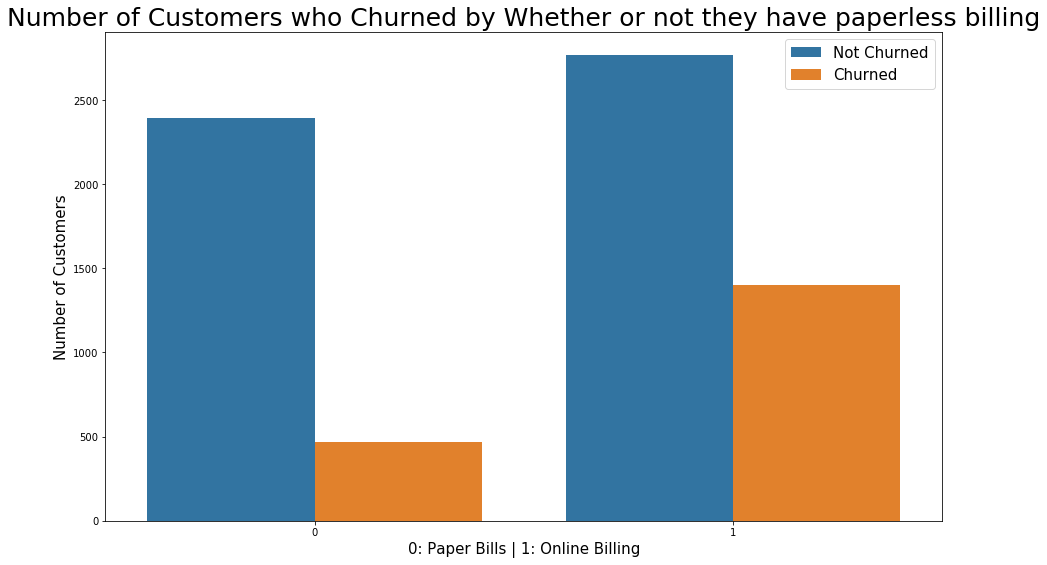

In [39]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='paperlessbilling', hue='churn', data=df)
ax.set_xlabel('0: Paper Bills | 1: Online Billing', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Customers who Churned by Whether or not they have paperless billing', fontsize=25)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=15);

> Notes: Customers who receive paper bills have a higher ratio of non-churning to churning than customers who receive online billing. There are also more customers in general who receive online billing to paper bills.

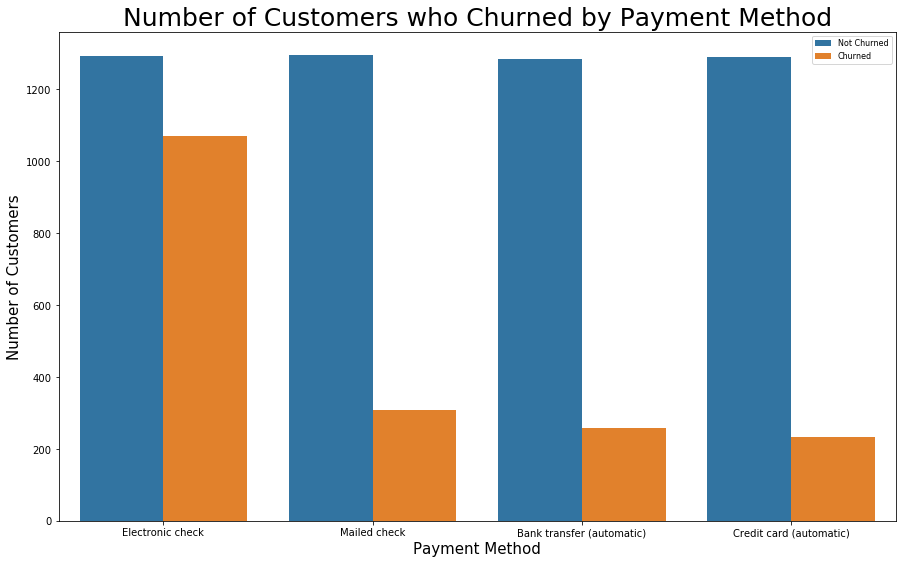

In [40]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.countplot(x='paymentmethod', hue='churn', data=df)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_xlabel('Payment Method', fontsize=15)
ax.set_title('Number of Customers who Churned by Payment Method', fontsize=25)
ax.legend(['Not Churned', 'Churned'], loc='upper right', fontsize=8);

> Notes: Customers who pay by electronic check have a substantially higher count of churning than all three other forms of payment.

### All Categorical Variables in One Place

In [41]:
cat_features = ['gender', 'seniorcitizen', 'partner', 'dependents',
                'phoneservice', 'multiplelines', 'internetservice',
                'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport', 'streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling', 'paymentmethod']

def plot_bar_cat_cols(df, cat_features, target_label, hue):
    fig, axs = plt.subplots(ncols=2, nrows=8, figsize=(50, 50))
    plt.subplots_adjust(right=1.5, top=1.25)
    for i, feature in enumerate(cat_features, 1):    
        plt.subplot(8, 2, i)
        sns.countplot(x=feature, hue=hue, data=df)
        plt.xlabel('{}'.format(feature), size=30, labelpad=15)
        plt.ylabel('Customer Count', size=30, labelpad=15)    
        plt.tick_params(axis='x', labelsize=30)
        plt.tick_params(axis='y', labelsize=30)

        plt.legend(['Not {}'.format(target_label), '{}'.format(target_label)], loc='upper right', prop={'size': 25})
        plt.title('Count of {} in {} Feature'.format(target_label, feature), size=40, y=1.05)

    plt.tight_layout(h_pad=5)
    plt.show();

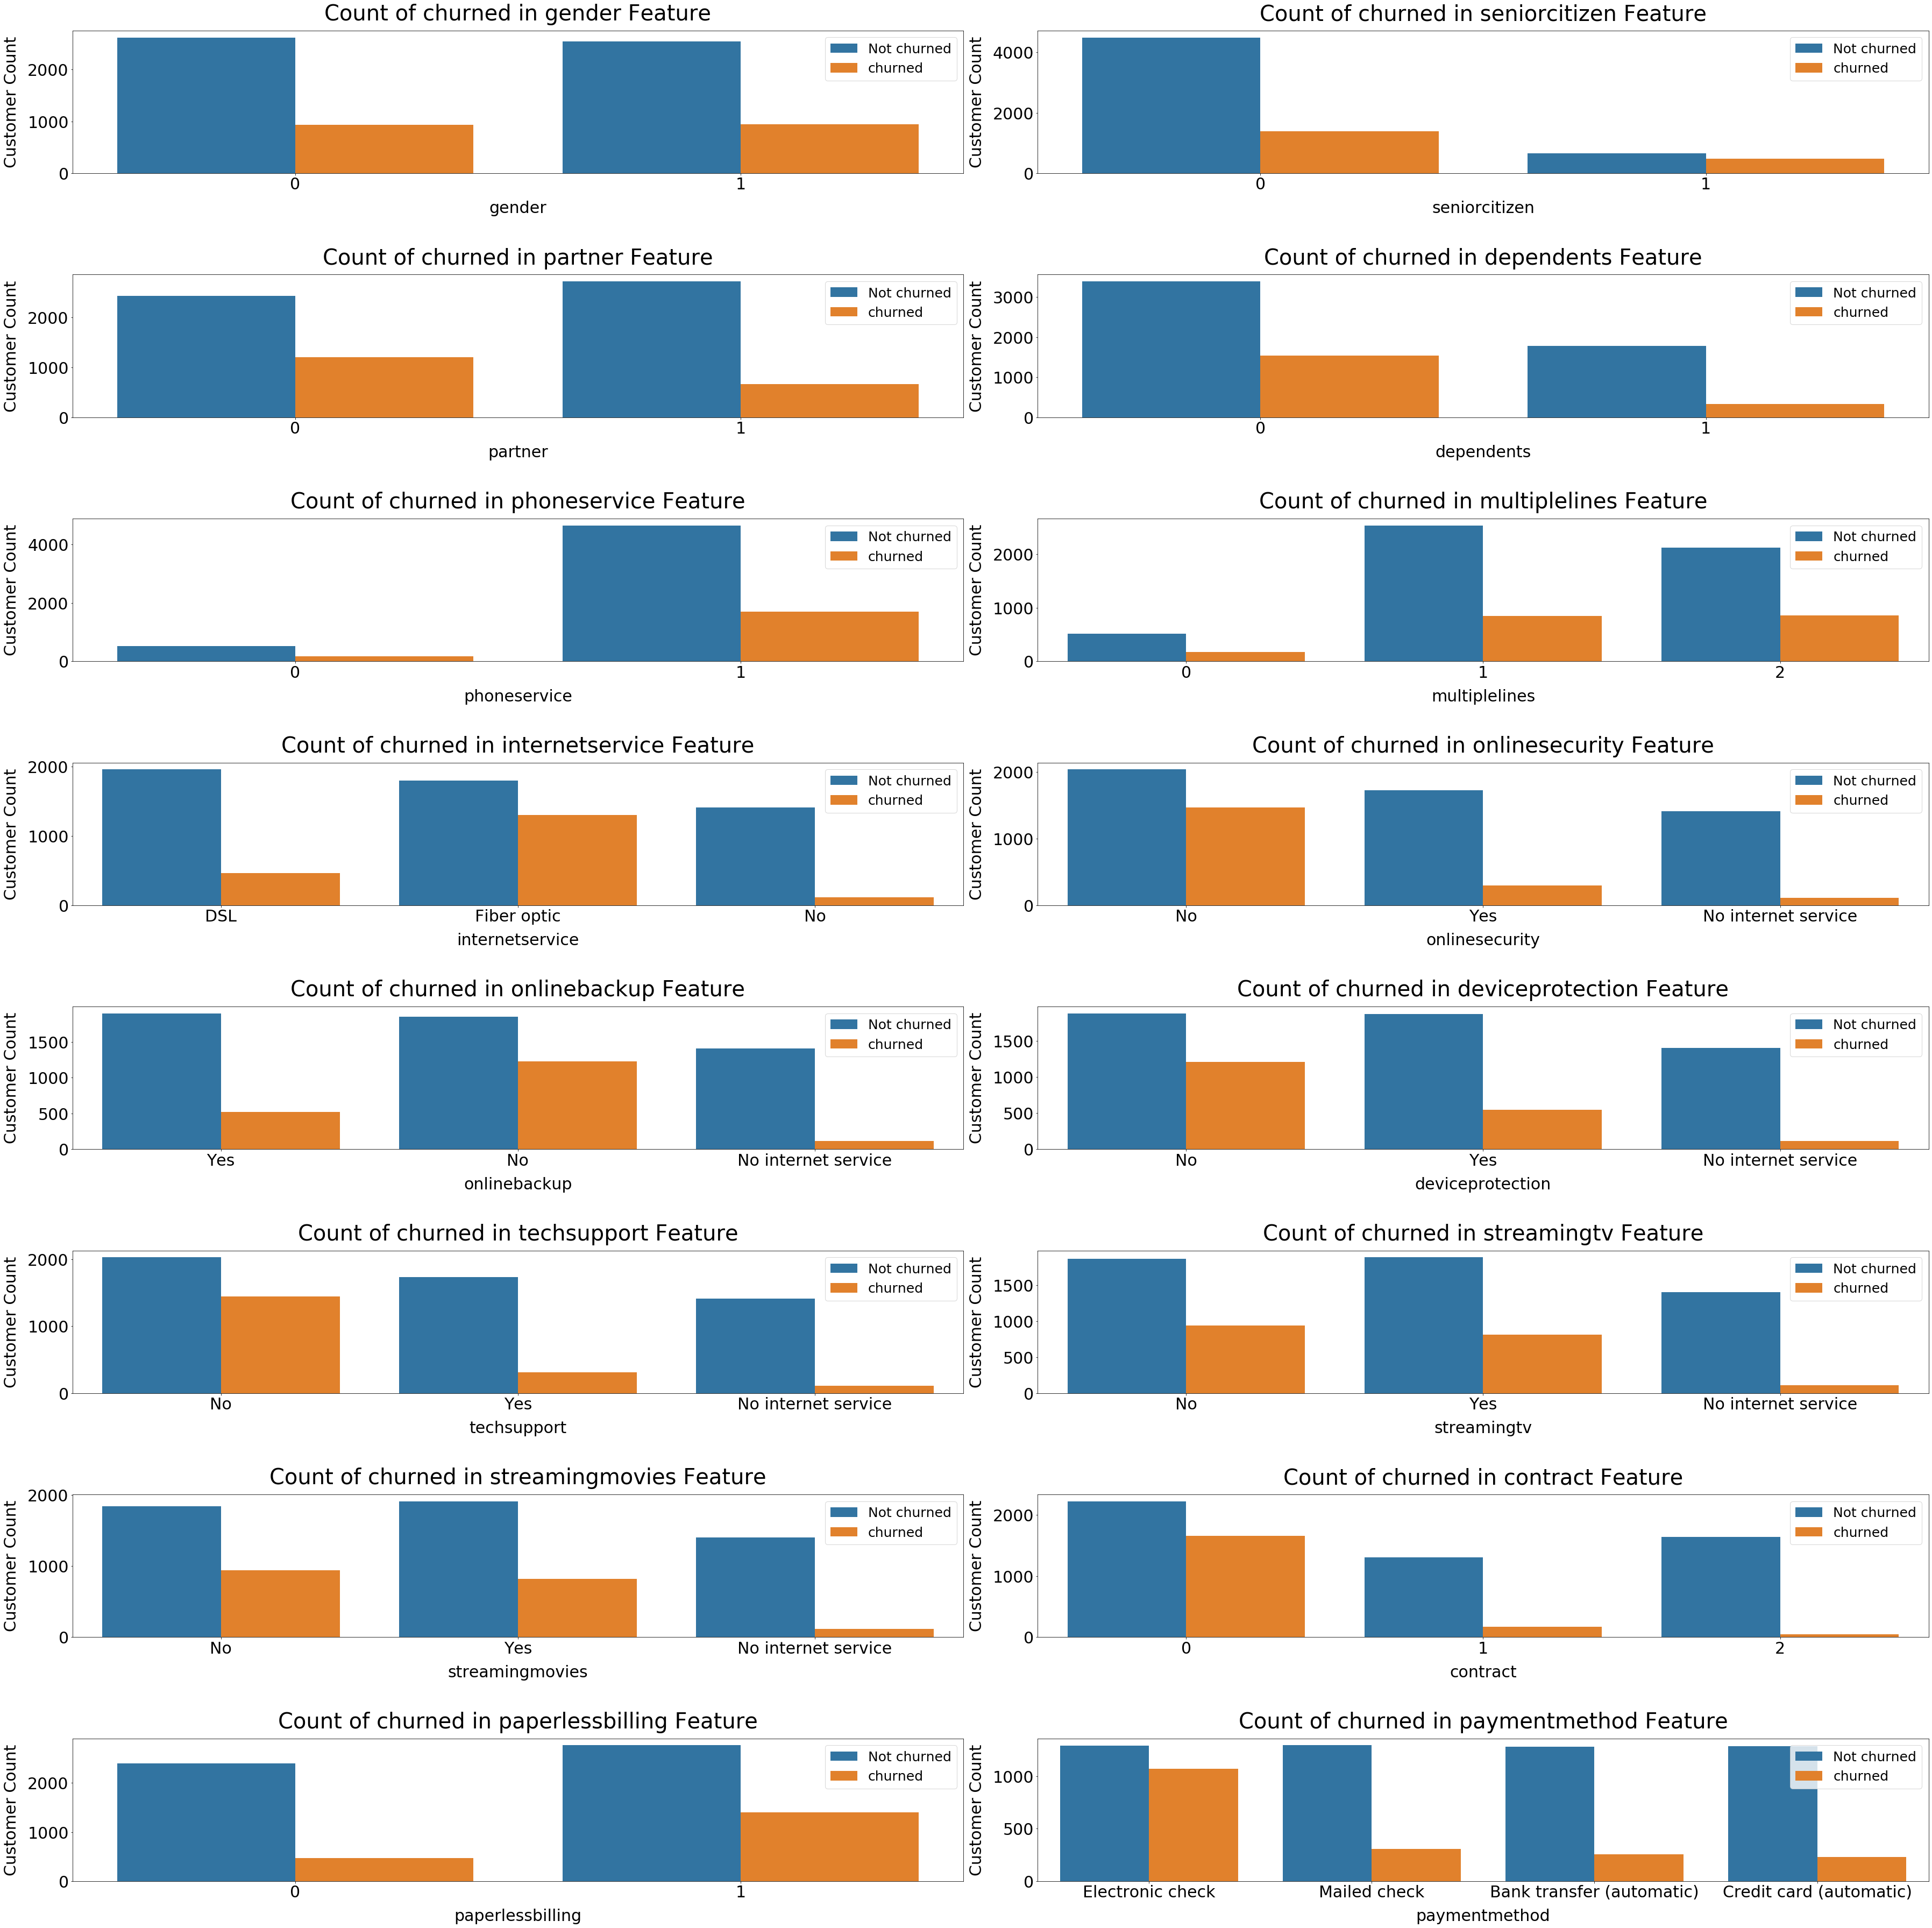

In [42]:
plot_bar_cat_cols(df, cat_features, 'churned', 'churn')

## Analyzing interactions between features and multicolinearity

In [43]:
# convert  categorical variables that have categorical column names into numerical
df.internetservice = df.internetservice.map({'No':0, 'DSL':1, 'Fiber optic':2})
df.onlinesecurity = df.onlinesecurity.map({'No':0, 'Yes':1, 'No internet service':2})
df.onlinebackup = df.onlinebackup.map({'No':0, 'Yes':1, 'No internet service':2})
df.deviceprotection = df.deviceprotection.map({'No':0, 'Yes':1, 'No internet service':2})
df.techsupport = df.techsupport.map({'No':0, 'Yes':1, 'No internet service':2})
df.streamingtv = df.streamingtv.map({'No':0, 'Yes':1, 'No internet service':2})
df.streamingmovies = df.streamingmovies.map({'No':0, 'Yes':1, 'No internet service':2})

# 'paymentmethod'
df.paymentmethod = df.paymentmethod.map({'Electronic check':0,
                                         'Mailed check':1,
                                         'Bank transfer (automatic)':2,
                                         'Credit card (automatic)':3})

> Notes: 'paymentmethod' column feels a little abstract to be converting into numerical values. But if I keep a key, it can make sense to allow to model the data (convert string values to floats).

In [44]:
# Creating a dataframe with all the binary columns
df_binary = df.drop(columns=['tenure', 'multiplelines', 'internetservice',
                             'onlinesecurity', 'onlinebackup', 'deviceprotection',
                             'techsupport', 'streamingtv', 'streamingmovies',
                             'contract', 'monthlycharges', 'totalcharges', 'churn'])

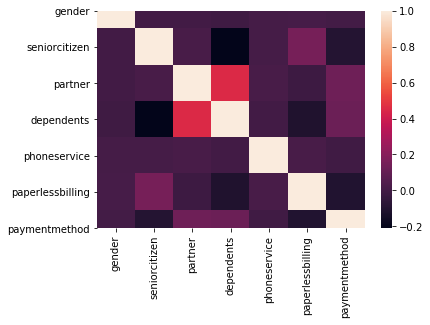

In [45]:
sns.heatmap(df_binary.corr());

> Notes: There appears to be some interaction between 'partner' and 'dependents,' which makes sense because likely those with dependents also have a partner.

In [46]:
# Creating a dataframe with service add-ons
df_serviceaddons = df.drop(columns=['gender','seniorcitizen','partner',
                                    'dependents','tenure','phoneservice',
                                    'paperlessbilling','paymentmethod','monthlycharges',
                                    'totalcharges','churn'])

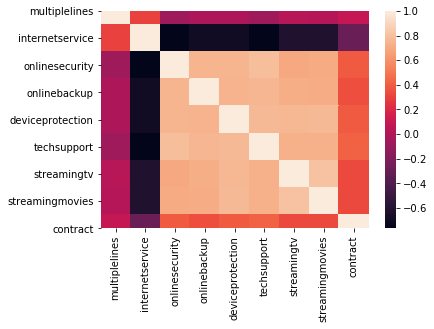

In [47]:
sns.heatmap(df_serviceaddons.corr());

> Notes: There is a large amount of interaction between the service add-ons. Mainly because there is a column that contains a value 'No internet service,' where if one customer has no internet service, all columns will appear with that same value.

## Feature Engineering

In [48]:
# can drop 'phoneservice' column because 'multiplelines'
# already asks whether or not customer has phone service
df_featureengineered = df.drop(columns='phoneservice')

In [49]:
# convert "No / Yes" add-ons services to numerical 0s and 1s
add_on_services = ['onlinesecurity', 'onlinebackup', 'deviceprotection',
                   'techsupport', 'streamingtv', 'streamingmovies']
df_featureengineered[add_on_services] = df[add_on_services].eq('Yes').mul(1)
df_featureengineered[add_on_services] = df_featureengineered[add_on_services].astype(float)

In [50]:
# create a new column 'numberofaddons', which is the sum of the number of service add-ons a customer has
df_featureengineered['numberofaddons'] = df_featureengineered[add_on_services].sum(axis=1)

In [51]:
# drop all the individual columns relating to the single add-ons
df_featureengineered = df_featureengineered.drop(columns=add_on_services)

In [52]:
# drop all the column 'tenure' because it is more a qualitative, expressive category
# moreso about the length of time someone was a customer after the fact
df_featureengineered = df_featureengineered.drop(columns='tenure')

## Visualizing Advance Relationships

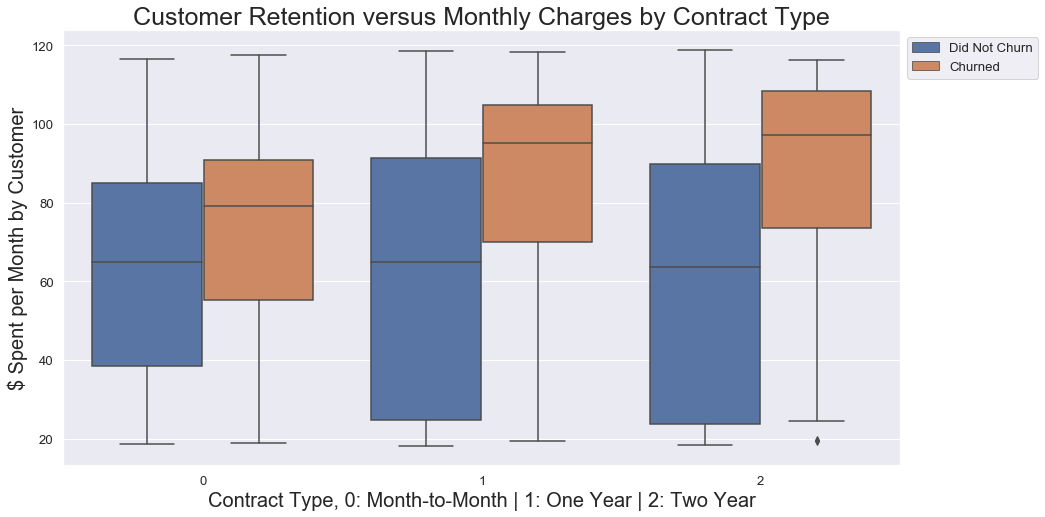

In [53]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.2)
pal = sns.color_palette("husl", 8)
ax = sns.boxplot(x='contract', y='monthlycharges',
            hue='churn',
            data=df_featureengineered)
ax.set_title('Customer Retention versus Monthly Charges by Contract Type', fontsize=25)
ax.set_xlabel('Contract Type, 0: Month-to-Month | 1: One Year | 2: Two Year', fontsize=20)
ax.set_ylabel('$ Spent per Month by Customer', fontsize=20)
leg=plt.legend(bbox_to_anchor=(1, 1))
leg.get_texts()[0].set_text('Did Not Churn')
leg.get_texts()[1].set_text('Churned');

In [54]:
df.paymentmethod = df.paymentmethod.map({0:'Electronic check',
                                         1:'Mailed check',
                                         2:'Bank transfer (automatic)',
                                         3:'Credit card (automatic)'})

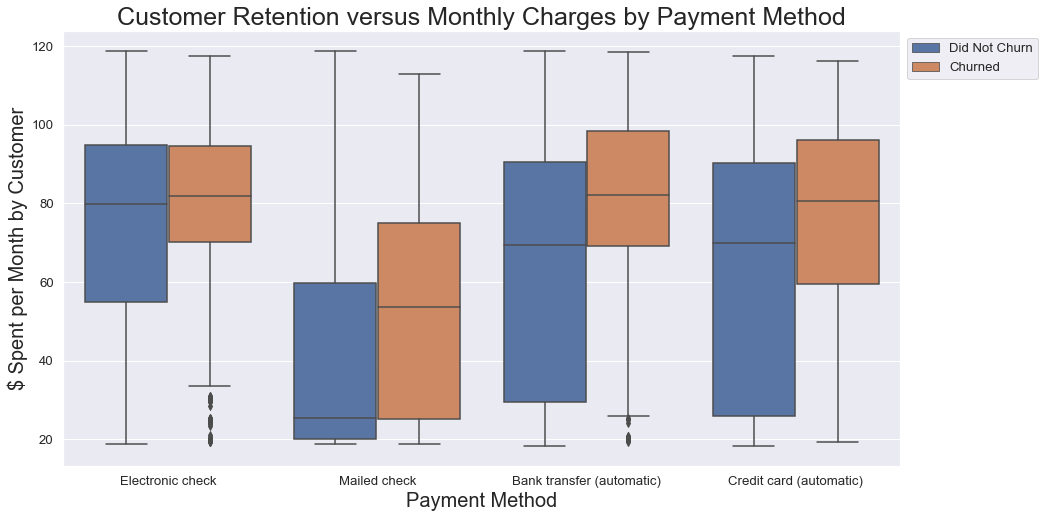

In [55]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.2)
pal = sns.color_palette("husl", 8)
ax = sns.boxplot(x='paymentmethod', y='monthlycharges',
            hue='churn',
            data=df)
ax.set_title('Customer Retention versus Monthly Charges by Payment Method', fontsize=25)
ax.set_xlabel('Payment Method', fontsize=20)
ax.set_ylabel('$ Spent per Month by Customer', fontsize=20)
leg=plt.legend(bbox_to_anchor=(1, 1))
leg.get_texts()[0].set_text('Did Not Churn')
leg.get_texts()[1].set_text('Churned');